<h1>Comparación de modelos de aprendizaje para la clasificación de vinos</h1>

<h2>Obtención y formato de los datos</h2>

In [1]:
import pandas as pd

In [2]:
#En primer lugar, leemos el dataset correspondiente a los vinos rojos
#El archivo csv venía con los datos separados por punto y coma, por lo tanto al leerlo con pandas se debe considerar aquello
#Más info: https://stackoverflow.com/questions/44195394/read-csv-file-with-semicolon-as-delimiter
#Cómo cargar un archivo csv en codelab: https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92
url = 'https://raw.githubusercontent.com/ManuelEV/wine_analysis/master/winequality-red.csv'
red_wines= pd.read_csv(url, sep = ';')
red_wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
#Luego leemos el dataset correspondiente a los vinos blancos
#El archivo csv venía con los datos separados por punto y coma, por lo tanto al leerlo con pandas se debe considerar aquello
#Más info: https://stackoverflow.com/questions/44195394/read-csv-file-with-semicolon-as-delimiter
url = 'https://raw.githubusercontent.com/ManuelEV/wine_analysis/master/winequality-white.csv'
white_wines= pd.read_csv(url, sep = ';')
white_wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


<h3>Attribute Information:</h3>
<br>
Dataset extraído de: https://archive.ics.uci.edu/ml/datasets/Wine+Quality
<br>
For more information, read [Cortez et al., 2009]. <br>
Input variables (based on physicochemical tests): <br>
1 - fixed acidity <br>
2 - volatile acidity <br>
3 - citric acid <br>
4 - residual sugar <br>
5 - chlorides <br>
6 - free sulfur dioxide <br>
7 - total sulfur dioxide <br>
8 - density <br>
9 - pH <br>
10 - sulphates <br>
11 - alcohol <br>
Output variable (based on sensory data): <br>
12 - quality (score between 0 and 10)
<h3>Problema de clasificación (a grandes rasgos):</h3>
<br>El problema a abordar corresponde a un problema de clasificación con 11 clases (entre 0 y 10), correspondiente a la calidad del vino, ya sea rojo o blanco
<h3>Análisis de los atributos</h3>
<br>


In [4]:
red_wines.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [5]:
white_wines.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [6]:
import numpy as np
print('Desvicación estándar para los vinos tintos')
np.std(red_wines)

Desvicación estándar para los vinos tintos


fixed acidity            1.740552
volatile acidity         0.179004
citric acid              0.194740
residual sugar           1.409487
chlorides                0.047051
free sulfur dioxide     10.456886
total sulfur dioxide    32.885037
density                  0.001887
pH                       0.154338
sulphates                0.169454
alcohol                  1.065334
quality                  0.807317
dtype: float64

In [7]:
print('Desvicación estándar para los vinos blancos')
np.std(white_wines)

Desvicación estándar para los vinos blancos


fixed acidity            0.843782
volatile acidity         0.100784
citric acid              0.121007
residual sugar           5.071540
chlorides                0.021846
free sulfur dioxide     17.005401
total sulfur dioxide    42.493726
density                  0.002991
pH                       0.150985
sulphates                0.114114
alcohol                  1.230495
quality                  0.885548
dtype: float64

<h2>Visualización de los datos</h2>

In [8]:
# forma convencional de importar Seaborn
import seaborn as sns
# Permite mostrar gráfica en el notebook
%matplotlib inline

<h3>Cantidad de registros según dataset (vino rojo/blanco)<h3>

1599
4898


(-1.2225197707514783,
 1.1106511886541168,
 -1.1046523789235543,
 1.1016998484999563)

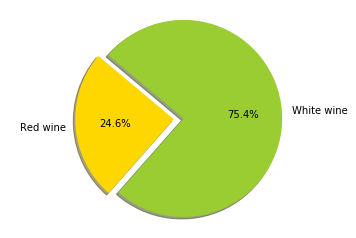

In [9]:
import matplotlib.pyplot as plt

print(red_wines['quality'].count())
print(white_wines['quality'].count())

# Data to plot
labels = 'Red wine', 'White wine'
sizes = [red_wines['quality'].count(), white_wines['quality'].count()]
colors = ['gold', 'yellowgreen']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')


<h3>Distribución (countplot) de la calidad del vino (rojo-blanco)</h3>

In [10]:
#Para más info sobre cómo usar pairplot:
#https://seaborn.pydata.org/generated/seaborn.pairplot.html
sns.set(style="ticks", color_codes=True)

Text(0, 0.5, 'Frecuencia')

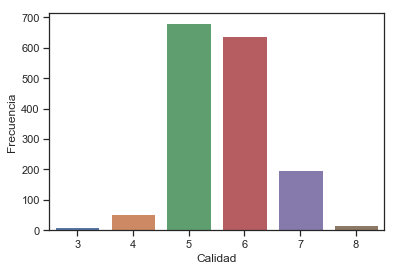

In [11]:
countplot = sns.countplot(red_wines['quality'])
countplot.set_xlabel("Calidad")
countplot.set_ylabel("Frecuencia")

Text(0, 0.5, 'Frecuencia')

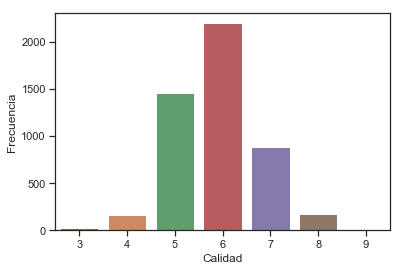

In [12]:
countplot = sns.countplot(white_wines['quality'])
countplot.set_xlabel("Calidad")
countplot.set_ylabel("Frecuencia")

In [13]:
#La variable data_columns contendrá los nombres de las columnas correspondientes a nuestra matriz de datos
data_columns = list(red_wines.columns.values)
data_columns.remove('quality')
print(data_columns)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


<h3>Características vs Calidad del vino</h3>


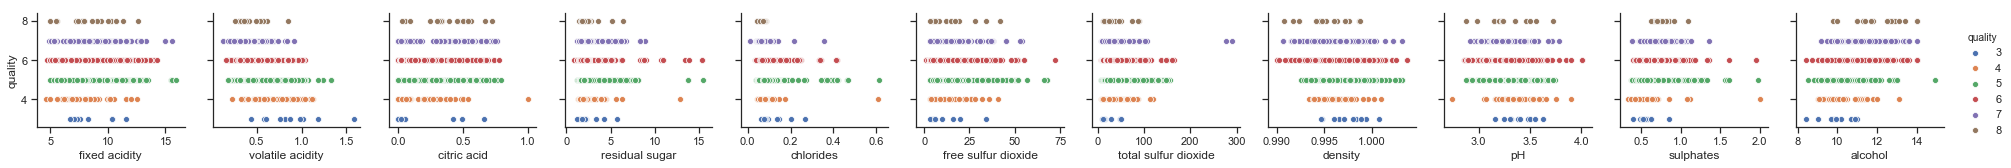

In [14]:
sns.pairplot(red_wines, x_vars=data_columns, y_vars='quality',hue="quality")

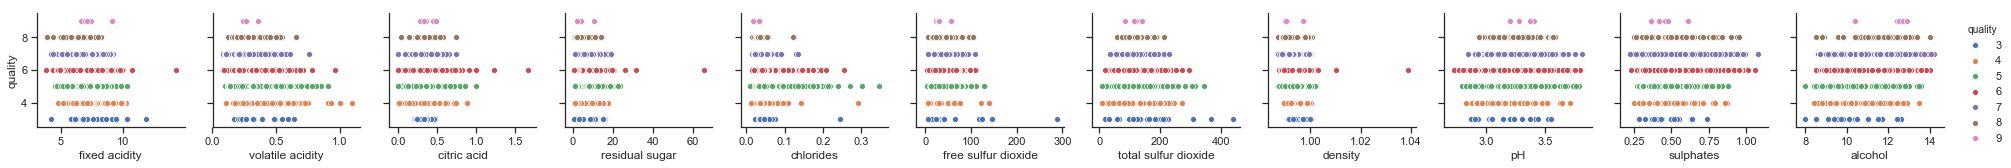

In [15]:
sns.pairplot(white_wines, x_vars=data_columns, y_vars='quality',hue="quality")

<h3>Antes de analizar los modelos...</h3>
<br>
La forma en que se distribuyen las características según la calidad de los vinos indica que modelos como regresión lineal no se acomodan para este contexto
<br>

<h2>Selección de modelo</h2>
<br>
El objetivo de esta sección es predecir la calidad del vino (rojo y blanco de forma independiente) según sus características.


Modelo:
<br>
**KNeighborsClassifier**
<br>
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
<br>
Se utiliza **GridSearchCV** con cv=10. La métrica a maximizar es la exactitud (accuracy)


<h3>Red wine</h3>

In [16]:

X = red_wines[data_columns]
y = red_wines['quality']


In [17]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

In [18]:
from sklearn.model_selection import GridSearchCV

In [19]:
# definir los valores de los parámetros que queremos buscar (los K)
k_range = list(range(1, 61))
weight_options = ['uniform', 'distance'] # nuevo parámetro, permite ponderar features según el problema
# este nuevo parámetro se utilizará con cada K para KNN

# Crear la malla con parámetros: mapea los nombres de los parámetros con los valores que debería buscar (es un diccionario)
param_grid = dict(n_neighbors=k_range, weights=weight_options)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60], 'weights': ['uniform', 'distance']}


In [20]:
scoring = ['accuracy','recall_micro']
grid = GridSearchCV(knn, param_grid, cv=10, scoring=scoring, return_train_score=False, refit='accuracy')

In [21]:
grid.fit(X,y)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit='accuracy', return_train_score=False,
       scoring=['accuracy', 'recall_micro'], verbose=0)

<h4>Se examina el mejor modelo</h4>

In [22]:
# examine the best model
print('Best model:')
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

#¿Cuál es el índice del mejor modelo?
best_index = grid.best_index_

#Se le asignan los resultados de gridcv a un dataframe
best = pd.DataFrame(grid.cv_results_)

#Se escoge el mejor resultado y se le asigna las columnas de interés
best = best.iloc[best_index]
best = best[['std_test_accuracy','mean_test_accuracy','mean_test_recall_micro','params']]
print('Información del mejor modelo:')
print(best)

Best model:
0.5159474671669794
{'n_neighbors': 24, 'weights': 'distance'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=24, p=2,
           weights='distance')
Información del mejor modelo:
std_test_accuracy                                          0.0479794
mean_test_accuracy                                          0.515947
mean_test_recall_micro                                      0.515947
params                    {'n_neighbors': 24, 'weights': 'distance'}
Name: 47, dtype: object


<h4>Ajuste de parámetros - ¿Y si eliminamos columnas del dataset?</h4>
Ahora se probará el rendimiento si sacamos los dos atributos que presentan una **mayor desviación estándar**

In [23]:
col = data_columns
#Se eliminan las columnas que presenten mayor desviación estándar
col.remove('free sulfur dioxide')
col.remove('total sulfur dioxide')

X = red_wines[col]
y = red_wines['quality']

In [24]:
grid = GridSearchCV(knn, param_grid, cv=10, scoring=scoring, return_train_score=False, refit='accuracy')

In [25]:
grid.fit(X,y)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit='accuracy', return_train_score=False,
       scoring=['accuracy', 'recall_micro'], verbose=0)

<h4>Se examina el mejor modelo</h4>

In [26]:
# examine the best model
print('Best model:')
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

#¿Cuál es el índice del mejor modelo?
best_index = grid.best_index_

#Se le asignan los resultados de gridcv a un dataframe
best = pd.DataFrame(grid.cv_results_)

#Se escoge el mejor resultado y se le asigna las columnas de interés
best = best.iloc[best_index]
best = best[['std_test_accuracy','mean_test_accuracy','mean_test_recall_micro','params']]
print('Información del mejor modelo:')
print(best)

Best model:
0.5778611632270169
{'n_neighbors': 59, 'weights': 'distance'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=59, p=2,
           weights='distance')
Información del mejor modelo:
std_test_accuracy                                          0.0521376
mean_test_accuracy                                          0.577861
mean_test_recall_micro                                      0.577861
params                    {'n_neighbors': 59, 'weights': 'distance'}
Name: 117, dtype: object


<h3>White wine</h3>


In [27]:
#Se obtienen nuevamente los nombres de las columnas del dataset
data_columns = list(red_wines.columns.values)
data_columns.remove('quality')

X = white_wines[data_columns]
y = white_wines['quality']

In [28]:
grid = GridSearchCV(knn, param_grid, cv=10, scoring=scoring, return_train_score=False, refit='accuracy')

In [29]:
grid.fit(X,y)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit='accuracy', return_train_score=False,
       scoring=['accuracy', 'recall_micro'], verbose=0)

<h4>Se examina el mejor modelo</h4>

In [30]:
# examine the best model
print('Best model:')
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

#¿Cuál es el índice del mejor modelo?
best_index = grid.best_index_

#Se le asignan los resultados de gridcv a un dataframe
best = pd.DataFrame(grid.cv_results_)

#Se escoge el mejor resultado y se le asigna las columnas de interés
best = best.iloc[best_index]
best = best[['std_test_accuracy','mean_test_accuracy','mean_test_recall_micro','params']]
print('Información del mejor modelo:')
print(best)

Best model:
0.45304205798285013
{'n_neighbors': 59, 'weights': 'distance'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=59, p=2,
           weights='distance')
Información del mejor modelo:
std_test_accuracy                                          0.0299632
mean_test_accuracy                                          0.453042
mean_test_recall_micro                                      0.453042
params                    {'n_neighbors': 59, 'weights': 'distance'}
Name: 117, dtype: object


<h4>Ajuste de parámetros - ¿Y si eliminamos columnas del dataset?</h4>
Ahora se probará el rendimiento si sacamos los dos atributos que presentan una **mayor desviación estándar**

In [31]:
col = data_columns
#Se eliminan las columnas que presenten mayor desviación estándar
col.remove('free sulfur dioxide')
col.remove('total sulfur dioxide')

X = white_wines[col]
y = white_wines['quality']

In [32]:
grid = GridSearchCV(knn, param_grid, cv=10, scoring=scoring, return_train_score=False, refit='accuracy')

In [33]:
grid.fit(X,y)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit='accuracy', return_train_score=False,
       scoring=['accuracy', 'recall_micro'], verbose=0)

<h4>Se examina el mejor modelo</h4>

In [34]:
# examine the best model
print('Best model:')
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

#¿Cuál es el índice del mejor modelo?
best_index = grid.best_index_

#Se le asignan los resultados de gridcv a un dataframe
best = pd.DataFrame(grid.cv_results_)

#Se escoge el mejor resultado y se le asigna las columnas de interés
best = best.iloc[best_index]
best = best[['std_test_accuracy','mean_test_accuracy','mean_test_recall_micro','params']]
print('Información del mejor modelo:')
print(best)

Best model:
0.4951000408329931
{'n_neighbors': 48, 'weights': 'distance'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=48, p=2,
           weights='distance')
Información del mejor modelo:
std_test_accuracy                                          0.0459262
mean_test_accuracy                                            0.4951
mean_test_recall_micro                                        0.4951
params                    {'n_neighbors': 48, 'weights': 'distance'}
Name: 95, dtype: object
